# **Visualitzacions dels orbitals d'un àtom d'hidrogen**

## **Context**

Abans de fer cap tipus de gràfic, primerament explicarem quines condicions s'han tingut en compte per a poder fer aquests gràfics que veureu més endavant:

1.   Fem servir la part real dels harmònics esfèrics que és físicament idèntic als homòlegs imaginaris.
2.  Adoptarem el sistema d'unitats atòmiques, és a dir: $a_0=1, \hbar=1, m_e=1, e=1$.

## **Part radial**

Per a poder representar aquesta part radial, utilitzarem el que es coneix com a *polinomis de Laguerre*. Aquests no són res més que les formules que teniu a la ***Taula 1.7. Part radial per a diferents orbitals atòmics.*** a la pàgina 46 del dossier ***TEMA 1. ESTRUCTURA ATÒMICA*** de l'assignatura de *Complements de Química*.

Per poder-ho representar de manera més eficaç, utilitzarem el polinomi de Laguerre:

$$R_{nl}(r) = \sqrt{\Big(\frac{2}{n a_0}\Big)^3 \frac{(n-l-1)!}{2n (n+l)!}} e^{-r/n a_0} \Big( \frac{2r}{na_0}\Big)^l  \cdot L^{2l+1}_{n-l-1} \Big(\frac{2r}{n a_0} \Big)$$

> No entrarem en la explicació concreta de la formula.

A continuació us ensenyarem com poder fer gràfiques dels orbitals atòmics amb unes llibreries de Python.

Per fer-ho, com sempre, el que primer hem de fer és importar i instal·lar aquestes llibreries que necessitem.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy.integrate as integrate
import scipy.special as spe

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import ipywidgets as widgets

!pip install ipyvolume
import ipyvolume as ipv

Amb totes les llibreries que necessitem cridades, podem definir la nostra funció de la part radial.

In [ ]:
def psi_R(r,n=1,l=0):
    coeff = np.sqrt((2.0/n)**3 * spe.factorial(n-l-1) /(2.0*n*spe.factorial(n+l)))
    laguerre = spe.assoc_laguerre(2.0*r/n,n-l-1,2*l+1)
    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre

Ara caldrà definir quin orbital volem graficar. Per això, hem de donar un valor a **$n$**, que és el nombre quàntic principal, i un valor a **$l$**, que ens defineix quin orbital volem dibuixar.

En aquest cas, dibuixem un orbital *p* amb nombre princial *5*.

In [ ]:
n = 4
l = 1

Definim les propietats que volem que tingui la nostra funció radial i el seu quadrat (densitat de probabilitat radial), i ja es pot graficar.

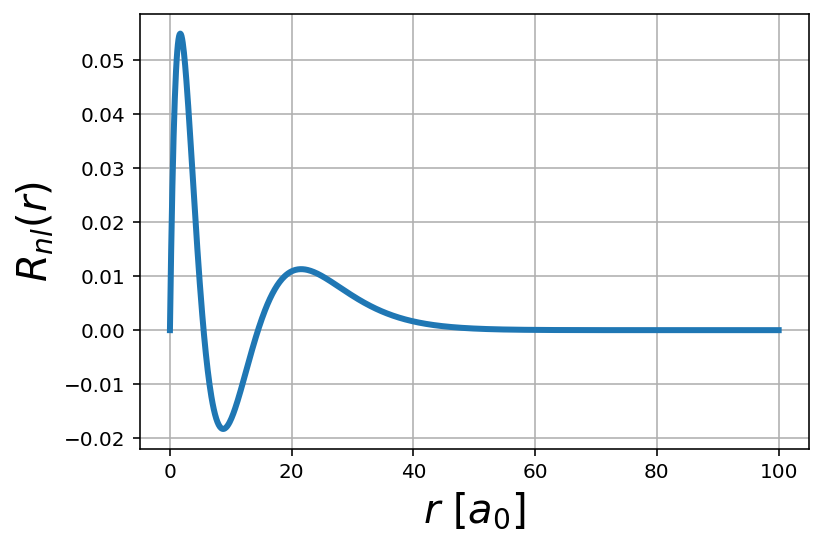

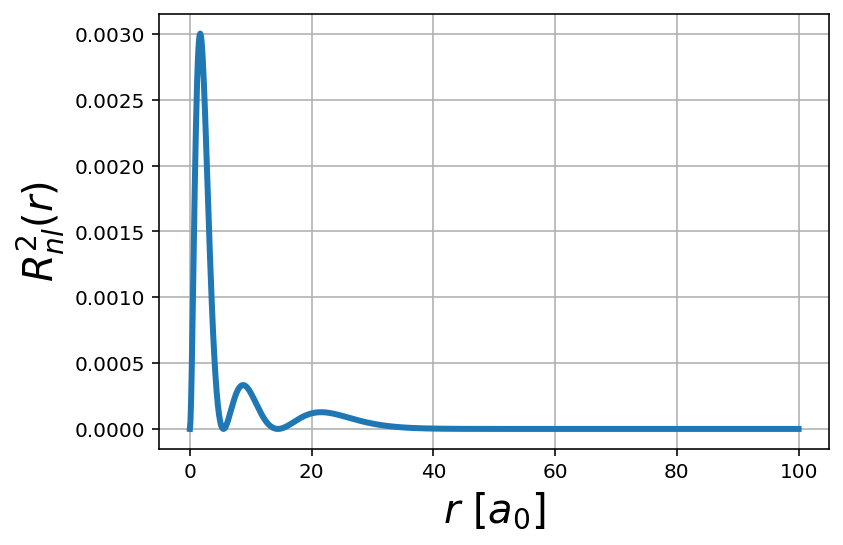

In [ ]:
r = np.linspace(0,100,1000)

R = psi_R(r,n,l)

plt.plot(r, R, lw=3)
plt.xlabel('$r$ $[a_0]$',fontsize=20)
plt.ylabel('$R_{nl}(r)$', fontsize=20)
plt.grid('True')
plt.show()

plt.plot(r, R**2, lw=3)
plt.xlabel('$r$ $[a_0]$',fontsize=20)
plt.ylabel('$R^2_{nl}(r)$', fontsize=20)
plt.grid('True')
plt.show()

El gràfic es pot modificar tal i com s'explica en l'apartat de "Gràfiques".

Una altra gràfica que podem fer amb la informació de la que ja disposem és la funció de distribució radial es representa com $D(r)=r^2 R(r)$.

Treballem igual que les anterior. Primer definim els valors de $n$ i $l$.


In [ ]:
n=3
l=1

Ara definim la funció i la grafiquem, en aquest cas la funció de distribució radial per un orbital *p* amb *n=3*.

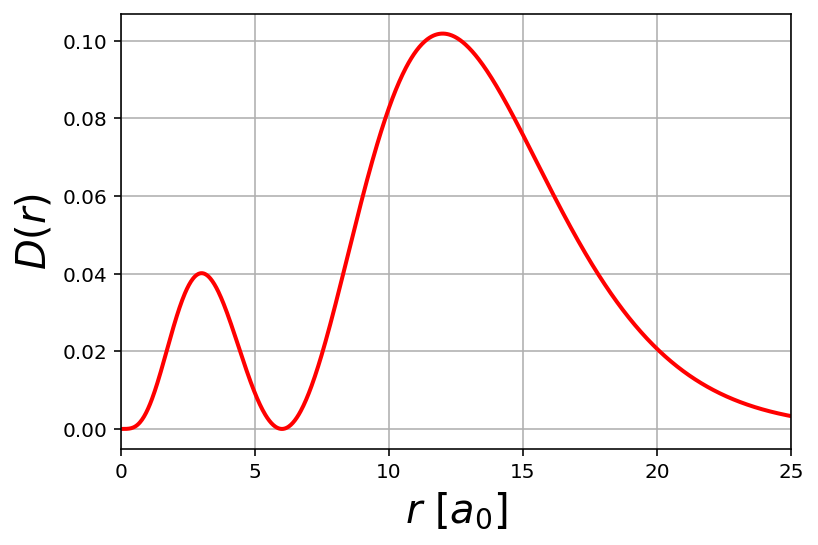

In [ ]:
r = np.linspace(0,250,10000)
D = psi_R(r,n,l)**2 * (r**2)

plt.xlabel('$r$ $[a_0]$',fontsize=20)
plt.ylabel('$D(r)$',fontsize=20)
rmax = n**2*(1+0.5*(1-l*(l+1)/n**2))
plt.xlim([0, 2*rmax])

plt.plot(r, D, lw=2, color='red')
plt.grid('True')
plt.show()

## **Part angular**

Per a poder representar aquesta part radial, utilitzarem el que es coneix com a *polinomis de Legendre*. Aquests no són res més que les formules que teniu a la ***Taula 1.8. Part angular per a diferents orbitals atòmics.*** a la pàgina 46 del dossier ***TEMA 1. ESTRUCTURA ATÒMICA*** de l'assignatura de *Complements de Química*.

Per poder-ho representar de manera més eficaç, utilitzarem el polinomi de Legendre:

$$Y_{lm}(\theta,\phi) = \Theta_{lm}(\theta) \Phi_m (\phi) = \sqrt{\frac{2l+1}{4\pi} \frac{(l-m)!}{(l+m)!} } P_{lm}(cos \theta) \cdot e^{im\phi}$$

> No entrarem en la explicació concreta de la formula.

Definim la funció de la part angular, igual com hem fet abans amb la part radial.

In [ ]:
def psi_ang(phi,theta,l=0,m=0):
    sphHarm = spe.sph_harm(m,l,phi,theta)
    return sphHarm.real

Ara definim l'orbital que volem graficar donant valors a **$l$** i **$m$** (nombre quàntic magnètic).

In [ ]:
l = 1
m = 0

Definida la funció, calculem els harmònics esfèrics $Y_{lm}(\phi,\theta)$ en els eixos $(\phi,\theta)$ i els convertim a coordenades Cartesianes.

In [ ]:
phi, theta = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

Ylm = psi_ang(theta,phi,l=2,m=0)

x = np.sin(phi) * np.cos(theta) * abs(Ylm)
y = np.sin(phi) * np.sin(theta) * abs(Ylm)
z = np.cos(phi) * abs(Ylm)

Finalment només ens queda graficar aquest orbital.

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


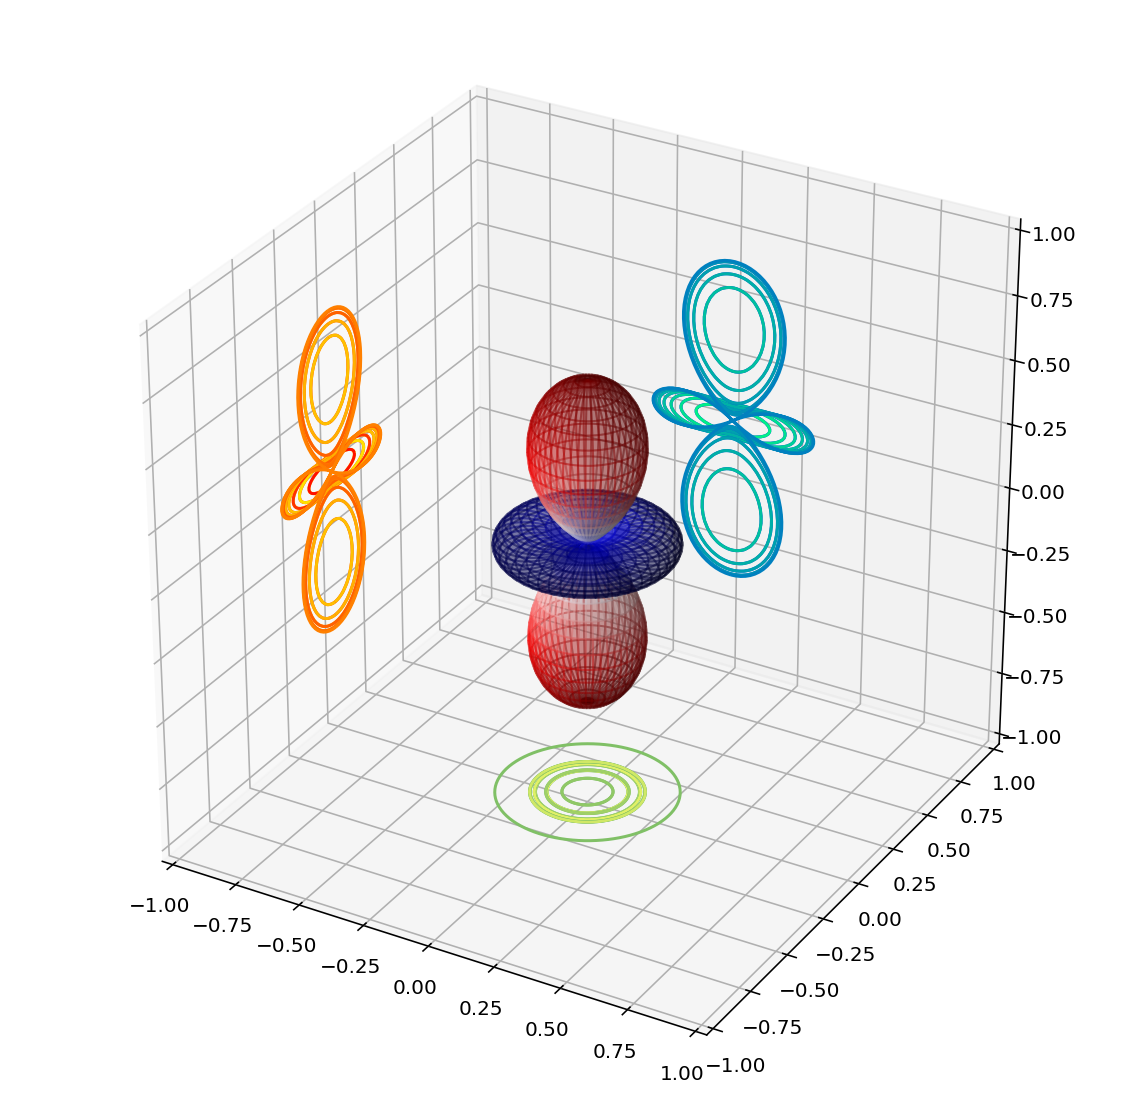

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fcolors = (Ylm - Ylm.min())/(Ylm.max() - Ylm.min())

ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors), alpha=0.3)

cset = ax.contour(x, y, z,20, zdir='z',offset = -1, cmap='summer')
cset = ax.contour(x, y, z,20, zdir='y',offset =  1, cmap='winter' )
cset = ax.contour(x, y, z,20, zdir='x',offset = -1, cmap='autumn')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.show()

Les dues primeres línies del codi anterior ens serveixen per a assentar la gràfica 3D, és la que ens proporciona els eixos de coordenades.
La línia que posa `fcolors = (Ylm - Ylm.min())/(Ylm.max() - Ylm.min())` és la que ens normalitza l'escala de color a $[0,1]$.
La de `ax.plot_surface`, com s'explica a l'apartat de gràfiques, és la que genera la superfíci en 3D de la part real de l'harmònic esfèric de la nostra funció.
El quart "paràgraf" és el que projecta el gràfic 3D a un gràfic 2D des dels 3 punts de vista diferents.
Per acabar, l'últim tall de codi que dir `ax.set_xlim()`, serveix unicament per deixar escalat entre -1 i 1.

Evidentment tots aquests espectes es poden modificar per obtenir el gràfic que nosaltres volem.

## **Graficar els orbital atòmics complets**

Tot el que acabem de beure fins ara són la part radial i angular de l'àtom d'hidrogen per separat, però tal com s'explica a l'assignatura de *Complements de Química*, per poder obtenir la funció completa de l'orbital atòmic, només cal multiplicar la part radial per la part angular que hem definit abans.

In [ ]:
def HFunc(r,theta,phi,n,l,m):
    return psi_R(r,n,l) * psi_ang(phi,theta,l,m)

Aquí, simplement el que haurem de fer és donar els valors de $n$, $l$ i $m$ i el codi mateix ens ho graficarà.

In [ ]:
n=5
l=2
m=1

$r$, $\theta$, $\phi$ ho calcula el mateix codi i per tant no cal donar-li més informació que els nombres quàntics per a poder observar els orbitals.

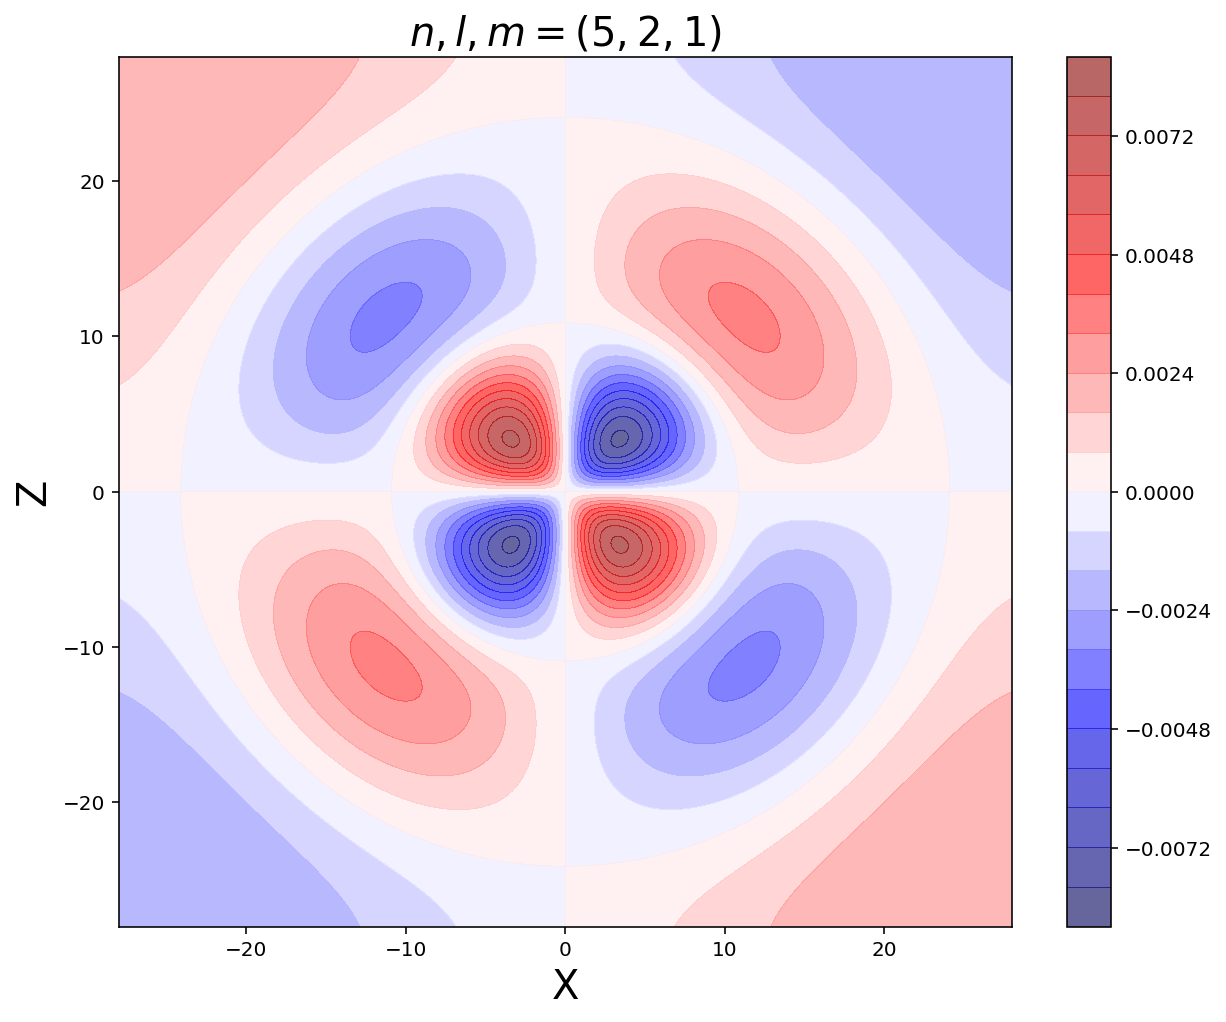

In [ ]:
if n > 9:
  print('El valor de n no pot ser superior a 9')
else:
  if l > n-1:
    print('El valor de l no pot ser superior a n-1')
  else:
    if m in range(-l-1,l+1):
      plt.figure(figsize=(10,8))
      limit = 4*(n+l) 
    
      x_1d = np.linspace(-limit,limit,500)
      z_1d = np.linspace(-limit,limit,500)
    
      x,z = np.meshgrid(x_1d,z_1d)
      y = 0
    
      r = np.sqrt(x**2 + y**2 + z**2)
      theta = np.arctan2(np.sqrt(x**2+y**2), z )
      phi = np.arctan2(y, x)

      psi_nlm = HFunc(r,theta,phi,n,l,m)
    
      plt.contourf(x, z,  psi_nlm, 20, cmap='seismic', alpha=0.6)
      plt.colorbar()
    
      plt.title(f"$n,l,m={n,l,m}$",fontsize=20)
      plt.xlabel('X',fontsize=20)
      plt.ylabel('Z',fontsize=20)
      plt.show()
    else:
      print("El valor de m ha d'estar entre -l i l")